In [7]:
%matplotlib notebook
import pandas as pd
import numpy as np
import glob
import json
from pprint import pprint
from collections import OrderedDict

import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
glob.glob("data/*.json")

['data/data_2019-05-11-190455.json',
 'data/data_2019-05-11-190300.json',
 'data/data_2019-05-11-190544.json']

In [3]:
raw = []
datafile = 'data/data_2019-05-11-190455.json'
with open(datafile, "r") as f:
    for row in f:
        item = json.loads(row)
        raw.append(item)

print("{} samples".format(len(raw)))

660 samples


In [4]:
pprint(raw[0])

{'distance': {'cm': 124.45, 'inches': 49.0},
 'euler_angles': {'heading': 277.0, 'pitch': -24.3125, 'roll': -0.125},
 'imu_calibration': {'accelerometer': 3,
                     'gyroscope': 3,
                     'magnetometer': 3,
                     'system': 3},
 'linear_acceleration': {'x': 0.22, 'y': -0.3, 'z': -0.18},
 'quaternion': {'w': 0.7325439453125,
                'x': 0.156494140625,
                'y': 0.14111328125,
                'z': 0.64727783203125},
 'time': {'scale': 'microsecond', 'start': 1557615895650430}}


In [5]:
def transform(instance):
    obj = {
        "time": instance["time"]["start"],
    }
    obj.update(instance["euler_angles"])
    obj.update(instance["distance"])
    return obj

data = [transform(ii) for ii in raw]
pprint(data[0])

{'cm': 124.45,
 'heading': 277.0,
 'inches': 49.0,
 'pitch': -24.3125,
 'roll': -0.125,
 'time': 1557615895650430}


In [8]:
df = pd.DataFrame(data)
df.head()

,cm,heading,inches,pitch,roll,time
0,124.45,277.0000,49.00,-24.3125,-0.1250,1557615895650430
1,124.48,277.4375,49.01,-24.0625,-0.5625,1557615895728580
2,124.04,277.6875,48.83,-23.6875,-0.6250,1557615895799426
3,112.21,278.0000,44.18,-23.6875,-1.0000,1557615895880311
4,110.96,278.4375,43.69,-23.5000,-1.1250,1557615895950342


In [9]:
df.describe()

,cm,heading,inches,pitch,roll,time
count,660.000000,660.000000,660.000000,660.000000,660.000000,6.600000e+02
mean,133.872197,277.317045,52.705848,-37.057008,-1.795360,1.557616e+15
std,144.584800,14.231179,56.923028,12.271199,1.967766,1.393060e+07
min,77.710000,243.437500,30.600000,-64.625000,-9.500000,1.557616e+15
25%,118.687500,269.359375,46.727500,-44.375000,-2.687500,1.557616e+15
50%,120.500000,278.593750,47.440000,-35.500000,-1.750000,1.557616e+15
75%,122.165000,284.750000,48.100000,-31.281250,-0.687500,1.557616e+15
max,1568.380000,311.312500,617.470000,-5.062500,3.375000,1.557616e+15


<IPython.core.display.Javascript object>


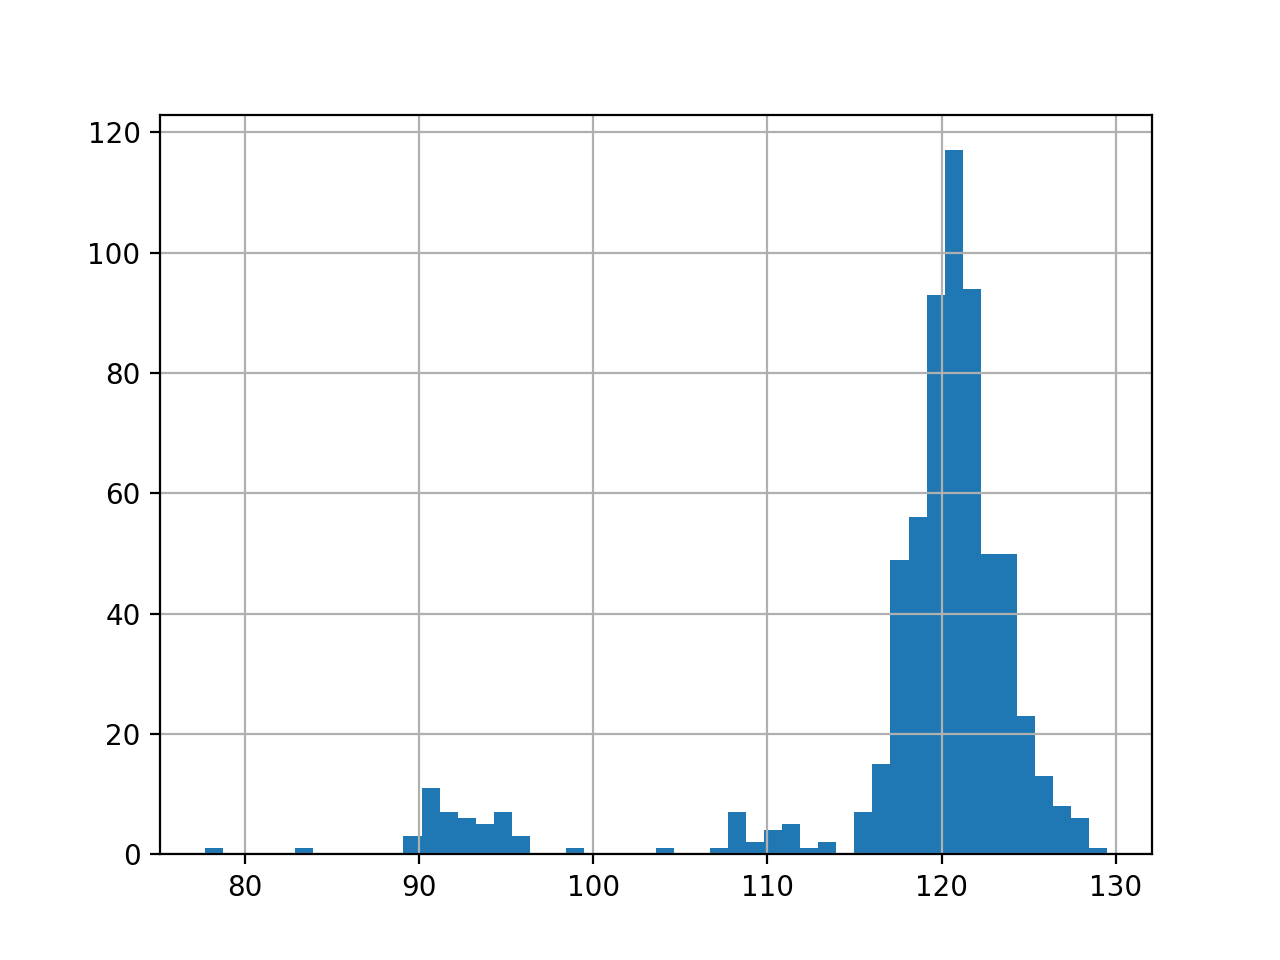

In [15]:
df["cm"][df["cm"] < 150].hist(bins=50)

<IPython.core.display.Javascript object>


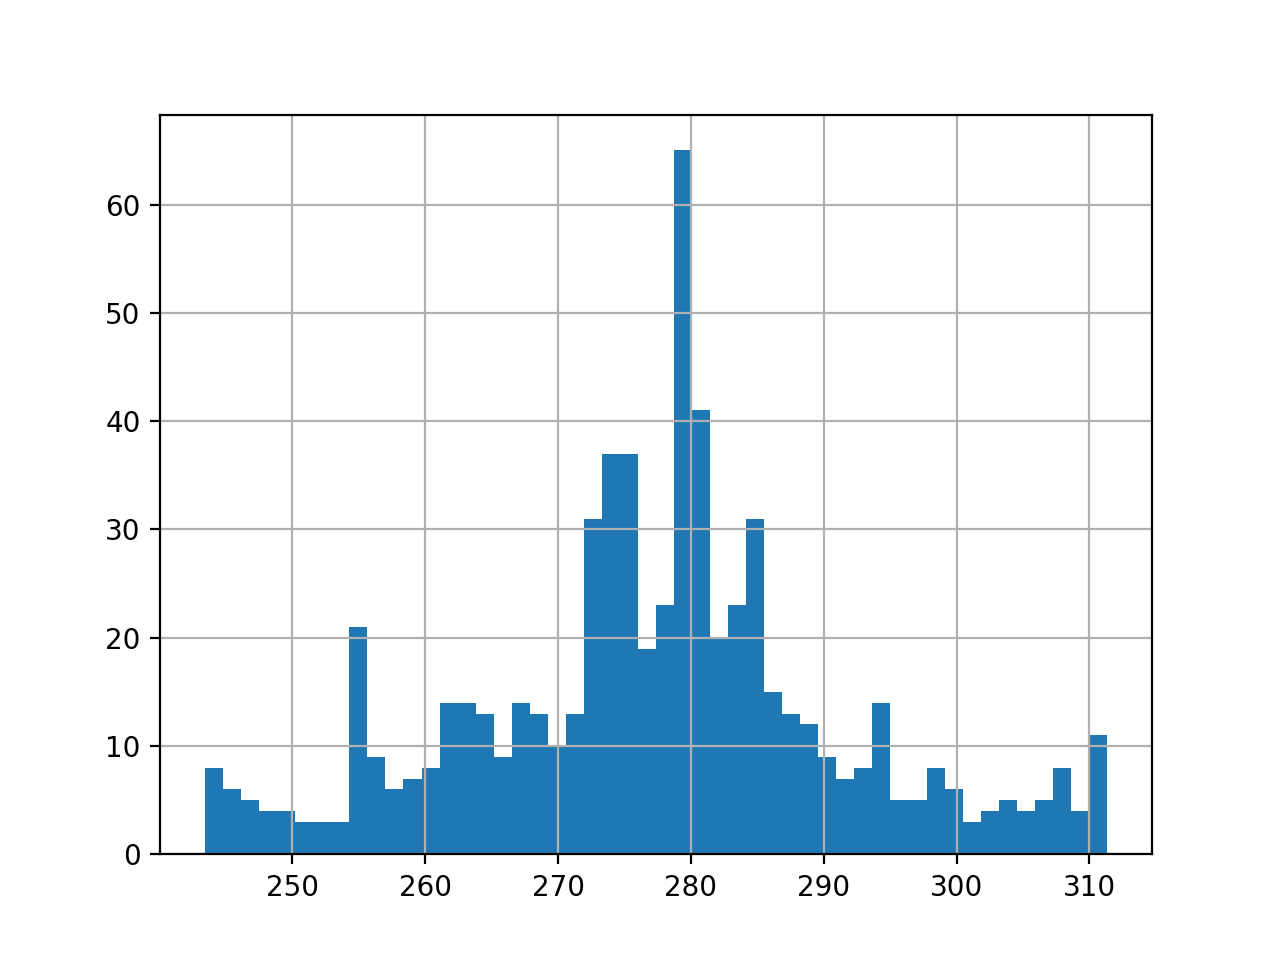

In [36]:
fig, ax = plt.subplots()
df["heading"].hist(bins=50)
plt.show()

<IPython.core.display.Javascript object>


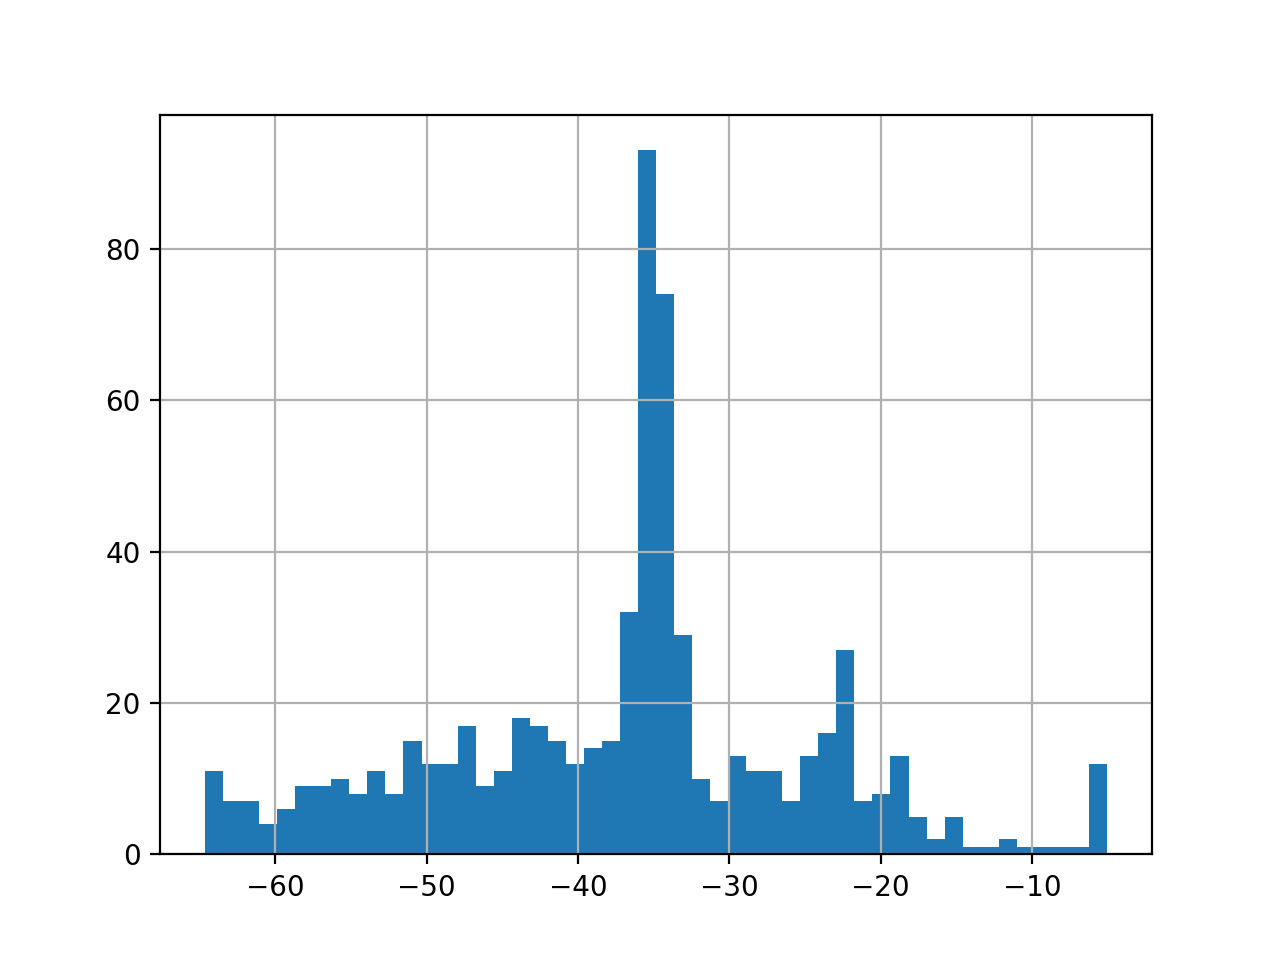

In [35]:
fig, ax = plt.subplots()
df["pitch"].hist(bins=50)
plt.show()

<IPython.core.display.Javascript object>


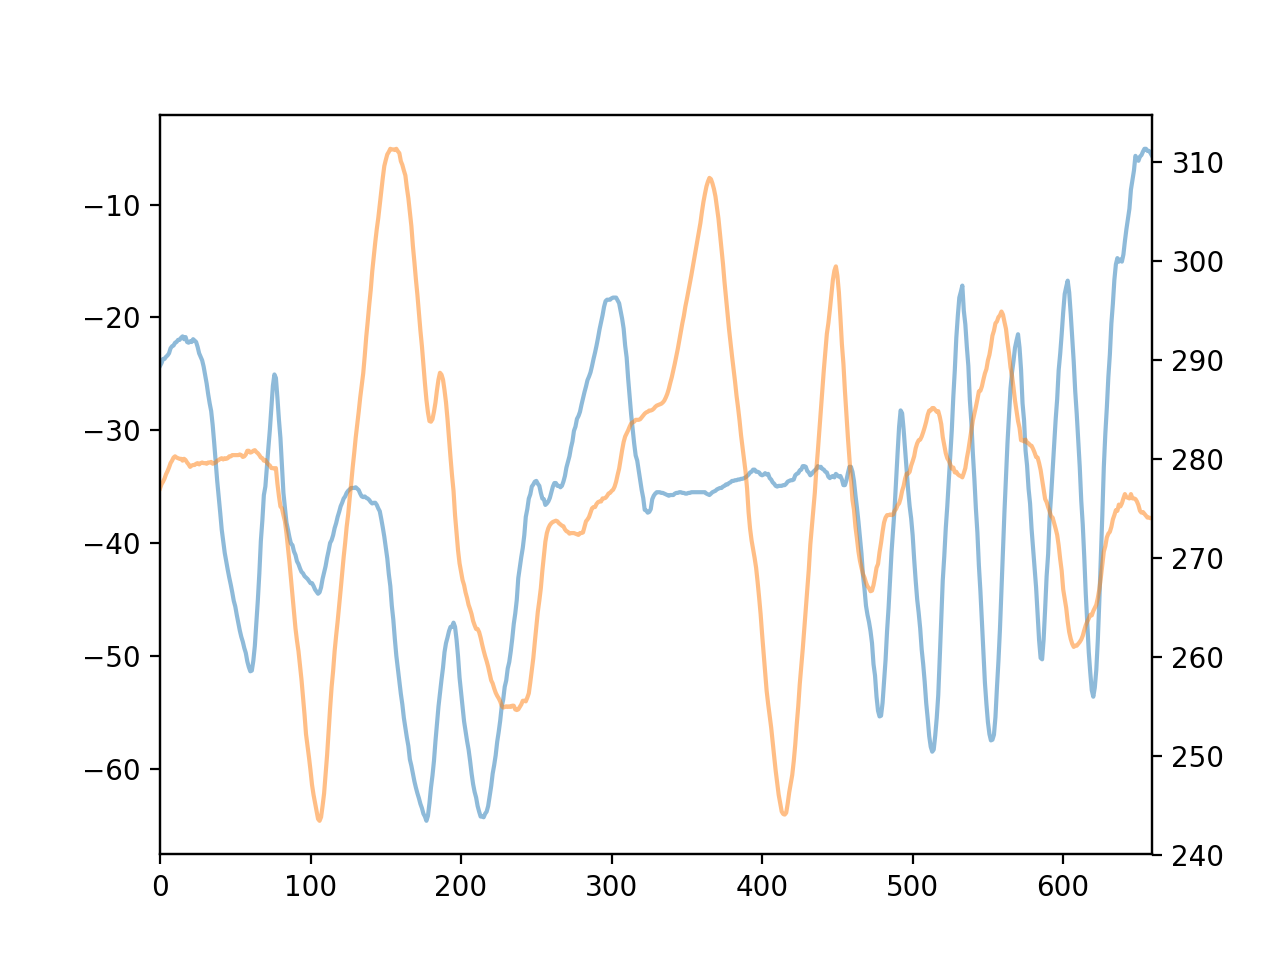

In [37]:
df["pitch"].plot(alpha=.5)
df["heading"].plot( alpha=.5, secondary_y=True)